In [2]:
pip install feather-format

  Created wheel for feather-format: filename=feather_format-0.4.1-py3-none-any.whl size=2453 sha256=cae32cc75b960dc1e99d87303e7f7572f59a8aefab9fc71abb7ea84af50eb659
  Stored in directory: /home/ec2-user/.cache/pip/wheels/9d/90/64/88411837e80bb520d15ae395f39359a5413e7a00ae63397e10
Successfully built feather-format
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import sagemaker
import boto3
import matplotlib.pyplot as plt 
pd.set_option('display.max_columns',None) # To display all columns
pd.set_option('display.max_rows',None) # To display all columns
client = boto3.client('s3')
import feather
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from functools import reduce

In [4]:
df = pd.read_feather('s3://haseebdata/Dataset/Data.ftr')

In [5]:
dfu = pd.read_feather('s3://haseebdata/Dataset/Users.ftr')
dfq = pd.read_feather('s3://haseebdata/Dataset/dfq.ftr')

## DATASET

In [6]:
df.head()

,index,timestamp,solving_id,question_id,user_answer,elapsed_time,user_iD,correct_answer,bundle_id,explanation_id,deployed_at,correct
0,0,1565096190868,1,5012,b,38.0,1,c,3544,3544,2019-09-17 02:43:28.616,0.0
1,1,1565096221062,2,4706,c,24.0,1,c,3238,3238,2019-10-30 05:34:30.723,1.0
2,2,1565096293432,3,4366,b,68.0,1,b,2898,2898,2019-10-30 05:37:51.451,1.0
3,3,1565096339668,4,4829,a,42.0,1,c,3361,3361,2019-06-24 09:24:51.347,0.0
4,4,1565096401774,5,6528,b,59.0,1,d,5060,5060,2019-10-17 03:03:15.009,0.0


In [8]:
#SORTING DATAFRAME BY TIMESTAMP AND USER ID
dfu= dfu.sort_values(['user_iD'], ascending=[True])
dfu.head()

,user_iD,Total Questions Attempted,Corrected,Incorrected,Percentage,elapsed_time
0,1,1082,753,329,69.593346,36.750
103211,2,1103,765,338,69.356301,24.000
205341,3,10,3,7,30.000000,38.000
305985,4,2699,1932,767,71.582067,27.666
408468,5,1233,754,479,61.151663,23.250


In [10]:
df_85 = dfu.loc[dfu['Percentage'] >= 85]
df_85.head()

,user_iD,Total Questions Attempted,Corrected,Incorrected,Percentage,elapsed_time
488880,58,7216,6568,648,91.019956,36.000
3150,103,7,6,1,85.714286,22.000
190937,285,74,73,1,98.648649,0.333
242583,338,928,792,136,85.344828,20.000
264909,360,675,574,101,85.037037,24.333


In [14]:
df_90 = dfu.loc[dfu['Percentage'] >= 90]
df_90.head()

,user_iD,Total Questions Attempted,Corrected,Incorrected,Percentage,elapsed_time
488880,58,7216,6568,648,91.019956,36.000
190937,285,74,73,1,98.648649,0.333
708625,853,38,35,3,92.105263,19.000
201669,2962,199,183,16,91.959799,24.000
260175,3554,438,405,33,92.465753,22.000


## PLOTS

<AxesSubplot:xlabel='user_iD'>

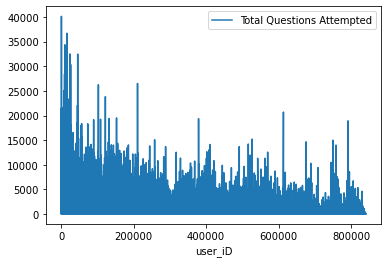

In [9]:
dfu.plot( x='user_iD', y='Total Questions Attempted')

<AxesSubplot:ylabel='Frequency'>

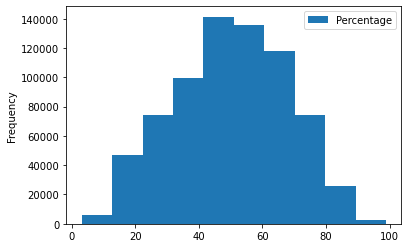

In [21]:
dfu.plot( x='Total Questions Attempted', y='Percentage' , kind ='hist')

<AxesSubplot:ylabel='Frequency'>

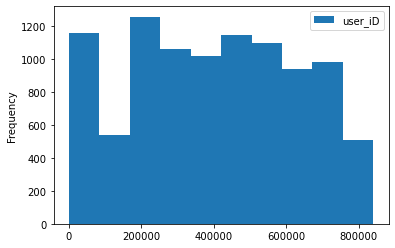

In [13]:
df_85.plot( x='Total Questions Attempted', y='user_iD' , kind ='hist')

<AxesSubplot:ylabel='Frequency'>

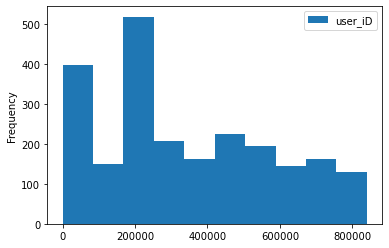

In [18]:
df_90.plot( x='Total Questions Attempted', y='user_iD' , kind ='hist')

<AxesSubplot:ylabel='Frequency'>

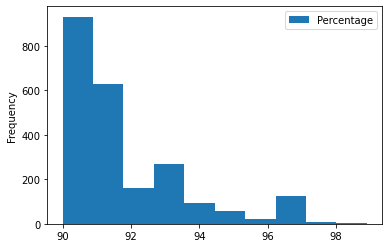

In [20]:
df_90.plot( x='Total Questions Attempted', y='Percentage' , kind ='hist')

## DESCRIBE THE USERS DATASET QUESTIONS ATTEMPTION

In [22]:
dfu['Total Questions Attempted'].describe()

count    724139.000000
mean        131.371001
std         563.985478
min           2.000000
25%           7.000000
50%          14.000000
75%          41.000000
max       40157.000000
Name: Total Questions Attempted, dtype: float64

## TOP USER 

In [23]:
top_U = dfu.loc[dfu['Total Questions Attempted']== 40157]
top_U 

,user_iD,Total Questions Attempted,Corrected,Incorrected,Percentage,elapsed_time
278286,373,40157,32139,8018,80.033369,22.25


## LOWEST USERS

In [25]:
low_U = dfu.loc[dfu['Total Questions Attempted']== 2]
low_U[0:5] 

,user_iD,Total Questions Attempted,Corrected,Incorrected,Percentage,elapsed_time
715699,92,2,1,1,50.0,13.0
649148,7552,2,1,1,50.0,28.0
707724,8445,2,1,1,50.0,27.5
717627,9381,2,1,1,50.0,46.5
718413,9454,2,1,1,50.0,11.0


In [26]:
len(low_U)

9731

## REPEATED QUESTIONS COUNT BY EACH QUESTION

In [27]:
df_i = df.groupby(['user_iD', 'question_id']).size().reset_index(name='counts')
df_i.head()

,user_iD,question_id,counts
0,1,7,2
1,1,10,2
2,1,11,1
3,1,13,1
4,1,29,1


## REPEAT QUESTIONS ATLEAST 2

In [28]:
Repeat = df_i.loc[df_i['counts'] > 1]
Repeat.head()

,user_iD,question_id,counts
0,1,7,2
1,1,10,2
7,1,59,2
20,1,150,2
26,1,174,2


In [ ]:
Repeat[0:50]